# `apply_padded`
Applies padding to an image before passing through specified function

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from edt import edt


## `im`
Generate a test image. Can be 2D or 3D image.

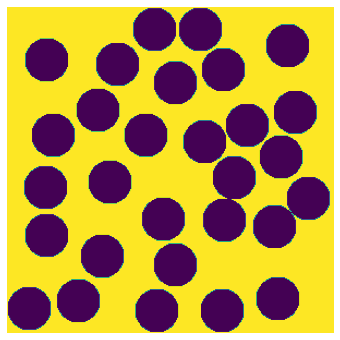

In [2]:
im = np.zeros([300, 300])
im = ps.generators.rsa(im, r=20, volume_fraction=0.4) == 0

plt.figure(figsize=[6, 6])
plt.axis(False)
plt.imshow(im);

## `func`
A good use case is `skeletonize_3d`, which has edge artifacts that can be reduced if the image is pre-padded. It works on 2D or 3D images.

In [3]:
func = skimage.morphology.skeletonize_3d

## `pad_width`
The amount of padding to add to each axis

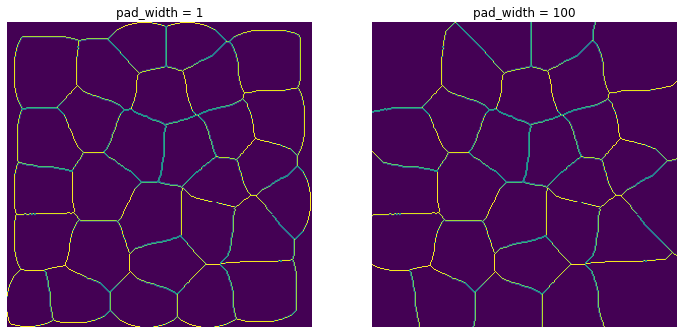

In [4]:
x1 = ps.filters.apply_padded(im=im, pad_width=1, func=func, pad_val=1)
x2 = ps.filters.apply_padded(im=im, pad_width=100, func=func, pad_val=1)

fig, ax = plt.subplots(1, 2, figsize=[12, 12]);
ax[0].imshow(x1);
ax[0].axis(False)
ax[0].set_title('pad_width = 1')
ax[1].imshow(x2);
ax[1].axis(False)
ax[1].set_title('pad_width = 100');

It's also useful for morphological operations such as `binary_opening`

In [5]:
func = skimage.morphology.binary_opening

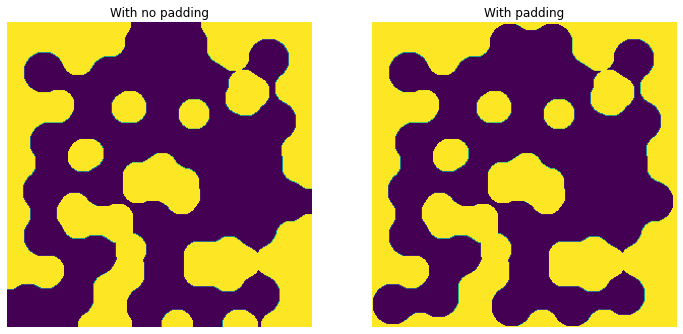

In [6]:
x3 = ps.filters.apply_padded(im=im, pad_width=0, func=func, pad_val=1, selem=ps.tools.ps_disk(15))
x4 = ps.filters.apply_padded(im=im, pad_width=50, func=func, pad_val=1, selem=ps.tools.ps_disk(15))

fig, ax = plt.subplots(1, 2, figsize=[12, 12]);
ax[0].imshow(x3)
ax[0].axis(False)
ax[0].set_title('With no padding')
ax[1].imshow(x4)
ax[1].axis(False)
ax[1].set_title('With padding');

## `pad_val`
The value to be placed in padded voxels. It is almost always 1 but setting to 0 may be useful for applying a distance transform.

In [7]:
func = edt

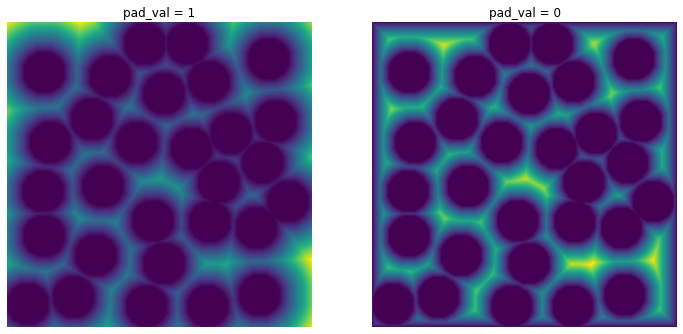

In [8]:
x5 = ps.filters.apply_padded(im=im, pad_width=10, func=func, pad_val=1)
x6 = ps.filters.apply_padded(im=im, pad_width=10, func=func, pad_val=0)

fig, ax = plt.subplots(1, 2, figsize=[12, 12]);
ax[0].imshow(x5);
ax[0].axis(False)
ax[0].set_title('pad_val = 1')
ax[1].imshow(x6);
ax[1].axis(False)
ax[1].set_title('pad_val = 0');